# Part Ⅱ :

---

### Nationalities frequency of Top 500 players (Overall rate):
* The frequency calculated by overall rating sum.

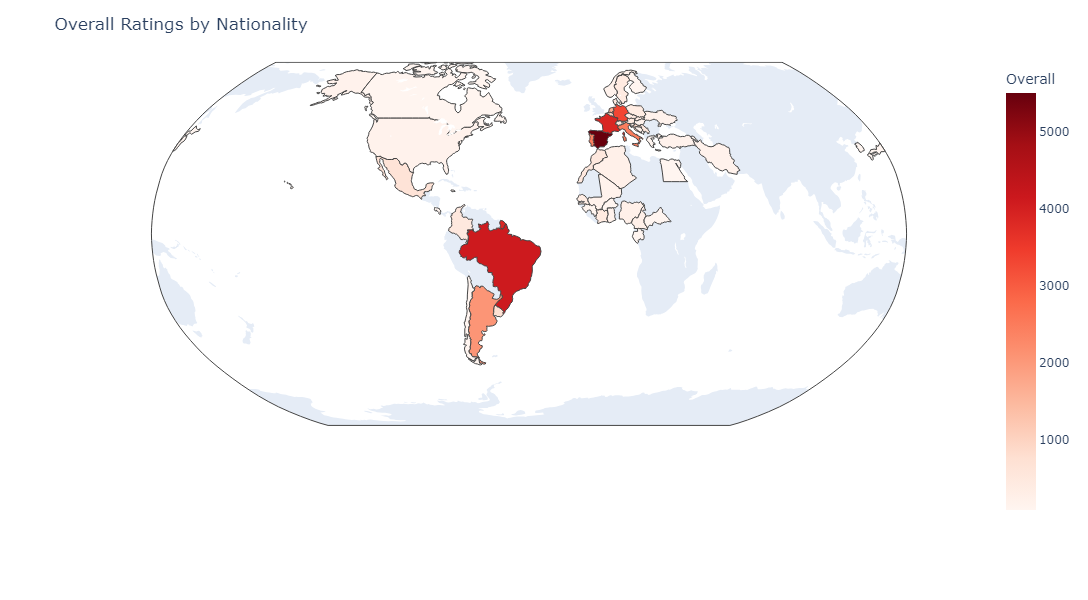

,Overall
Nationality,
Spain,5512
Brazil,4117
France,3887
Germany,3321
England,3221
Italy,2477
Portugal,2399
Argentina,2060
Netherlands,1640


In [28]:
best2 = best.head(500).groupby('Nationality').sum().sort_values('Overall',ascending = False).reset_index()
fig = px.choropleth(best2, locations="Nationality", color="Overall", color_continuous_scale="Reds", hover_data=["Nationality", "Overall"], locationmode="country names")
fig.update_layout(title="Overall Ratings by Nationality", width=1000, height=600)
fig.update_layout(geo=dict(showframe=True, showcoastlines=False, projection_type='robinson'))
fig.show()
best2 = best2.set_index('Nationality')
best2.head(10)[['Overall']]

* Greatest scores belongs to the countries of Europe & South America.

### Countries with the highest total value of **All** players:

<IPython.core.display.Javascript object>

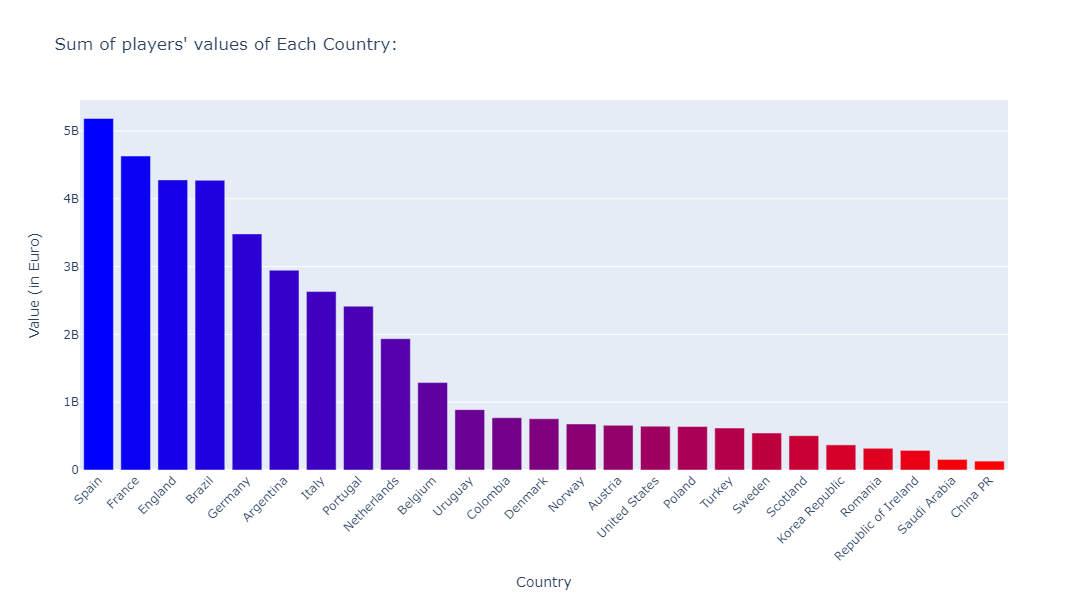

,Value(in Euro)
Nationality,
Spain,5184394999
France,4630494998
England,4279005000
Brazil,4272774989
Germany,3482149998
Argentina,2946924997
Italy,2631509999
Portugal,2416090000
Netherlands,1936534999


In [29]:
best2 = best.groupby('Nationality').sum().sort_values('Overall',ascending = False)
best2 = best2.head(25).sort_values('Value(in Euro)', ascending=False)
color_scale = np.linspace(0, 1, len(best2))
colors = [f'rgb({int(c*255)}, 0, {int((1-c)*255)})' for c in color_scale]
fig = go.Figure(data=[go.Bar(x=best2.index, y=best2['Value(in Euro)'], marker=dict(color =colors))])
fig.update_layout(xaxis_title='Country', yaxis_title='Value (in Euro)', title='Sum of players\' values of Each Country:', xaxis_tickangle=-45, height = 600)
fig.show()
best2.head(10)[['Value(in Euro)']]

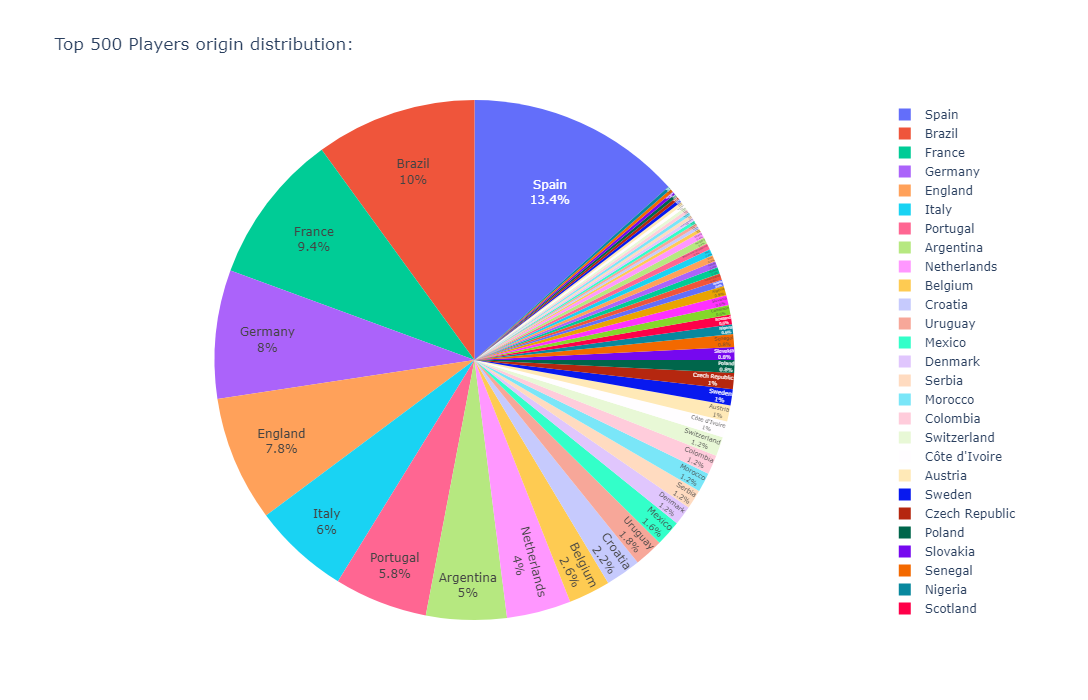

In [30]:
w = best.head(500).groupby('Nationality').size().sort_values(ascending = False)
fig = px.pie(w, values=w, names=w.index, title='Top 500 Players origin distribution:')
fig.update_layout(height = 700, width = 1050) 
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Data expansion:

* The following data set only includes international matches between national teams.

In [31]:
dat = pd.read_csv("https://raw.githubusercontent.com/EylonYehiel/projects/main/Data/goalscorers.csv")
dat.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41008 entries, 0 to 41007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       41008 non-null  object 
 1   home_team  41008 non-null  object 
 2   away_team  41008 non-null  object 
 3   team       41008 non-null  object 
 4   scorer     40959 non-null  object 
 5   minute     40750 non-null  float64
 6   own_goal   41008 non-null  bool   
 7   penalty    41008 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.0+ MB


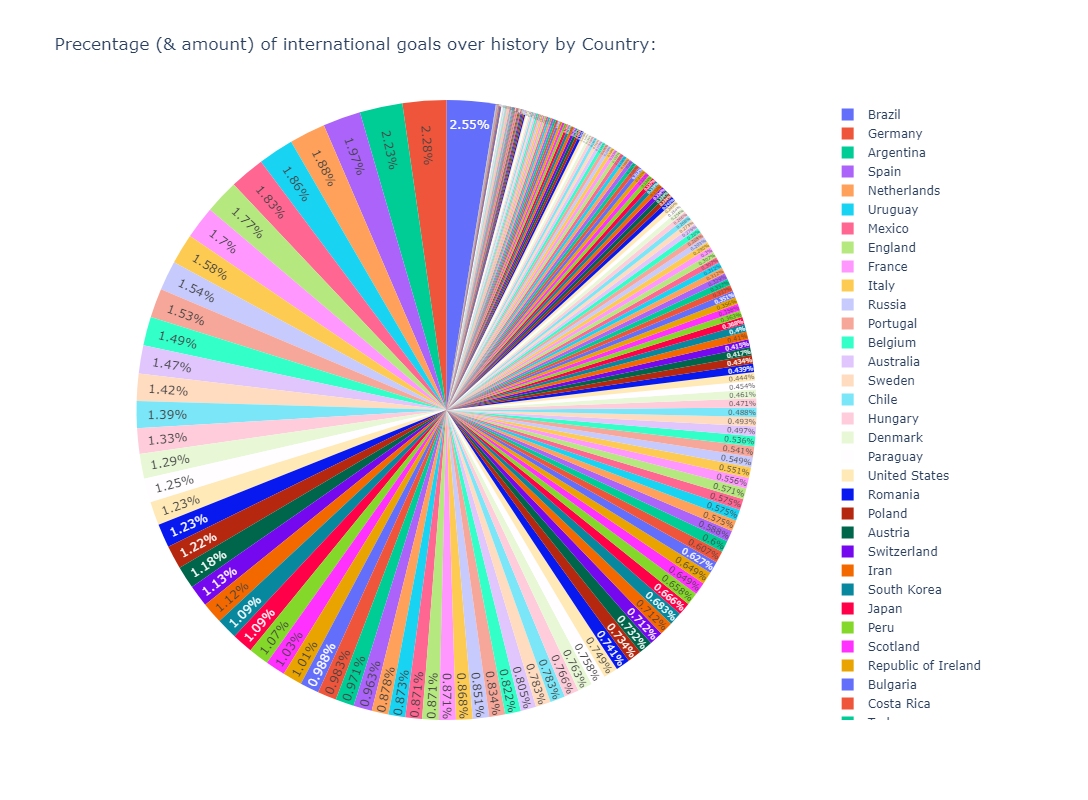

In [32]:
goals_count = dat['team'].value_counts().reset_index()
goals_count.columns = ['Country', 'Goals']

fig = px.pie(goals_count, values='Goals', names='Country', title='Precentage (& amount) of international goals over history by Country:')
fig.update_layout(height = 800, width = 1200) 
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

---

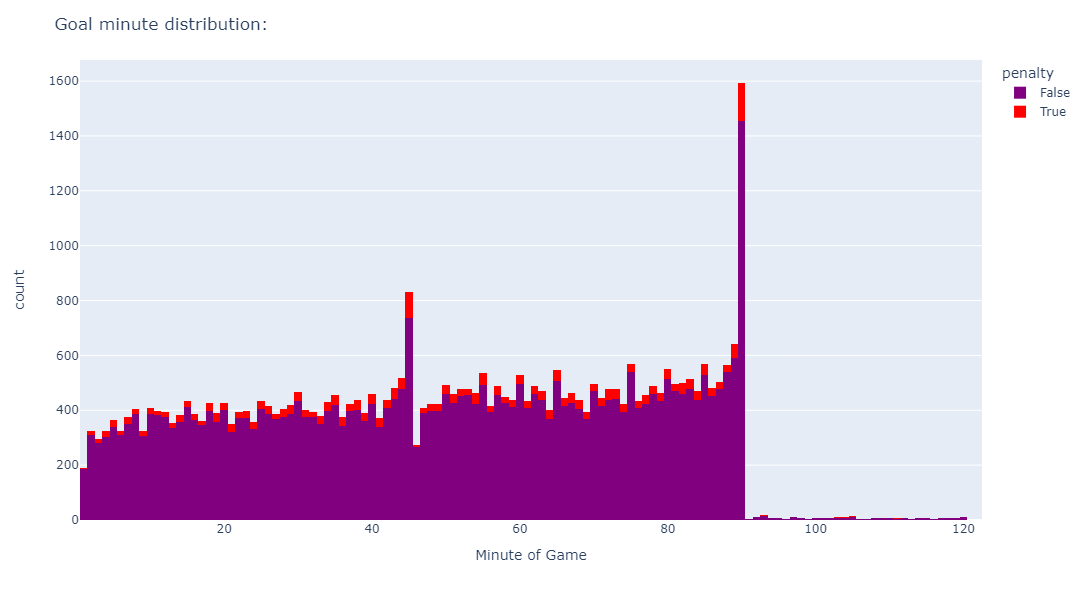

In [33]:
fig = px.histogram(dat,x = "minute",  color="penalty", color_discrete_sequence=['purple','red'])
fig.update_layout(title='Goal minute distribution:', xaxis_title='Minute of Game', height = 600)
fig.show()

In [34]:
dat = dat[dat.own_goal == False] # Ignoring own-goals
dat['goal'] = 1 # Numerize the significance of each row (a goal)
dat['cumulative'] = dat.groupby('scorer')['goal'].cumsum()
dat.set_index('date', inplace = True)
cdat = dat.sort_values('cumulative',ascending = False).reset_index()

<IPython.core.display.Javascript object>

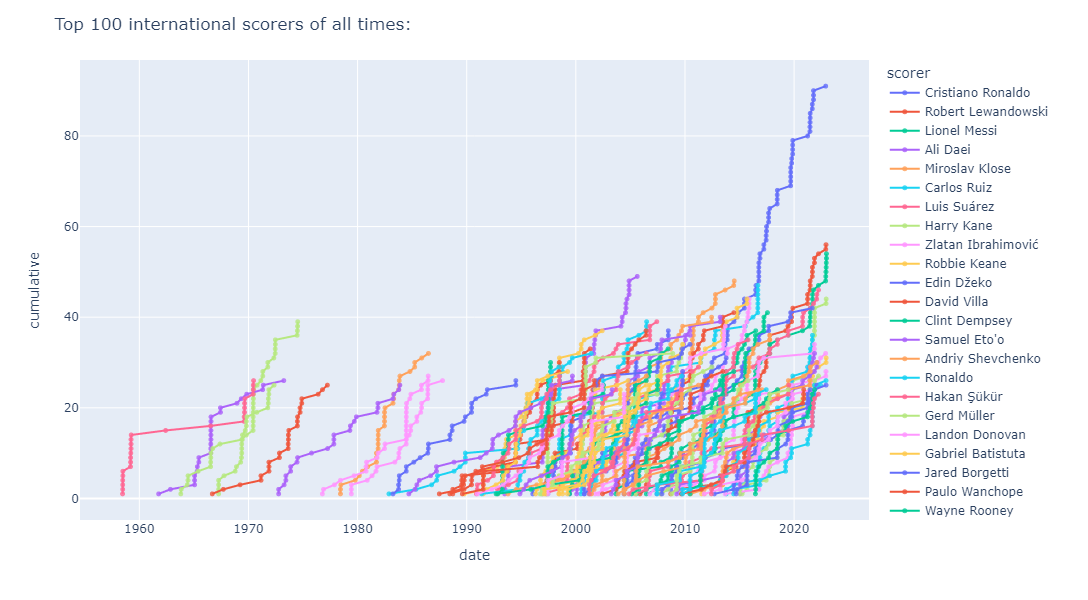

In [35]:
cdat['date'] = pd.to_datetime(cdat['date'])
cdat['day'] = cdat['date'].dt.day  # Extract the day from the date

top = cdat.groupby('scorer').max().sort_values('cumulative', ascending=False).head(100).index
fallafel = cdat[cdat.scorer.isin(top)]
fig = px.scatter(fallafel.reset_index(), x='date', y='cumulative', color='scorer', hover_name='scorer',
                 hover_data=['scorer', 'date','day' ,'team', 'cumulative']) 
fig.update_traces(mode='lines+markers', marker=dict(symbol='circle', size=5, opacity=0.8))
# option for adding a slider
# fig.update_xaxes(type='date', rangeslider_visible=True)
fig.update_layout(title="Top 100 international scorers of all times:", width=1050, height=600)
fig.show()

* Try to open a window inside the chart for zoom-in. 
* Double-click a name in the list to view its isolated information.

---

## Football teams Comparison:

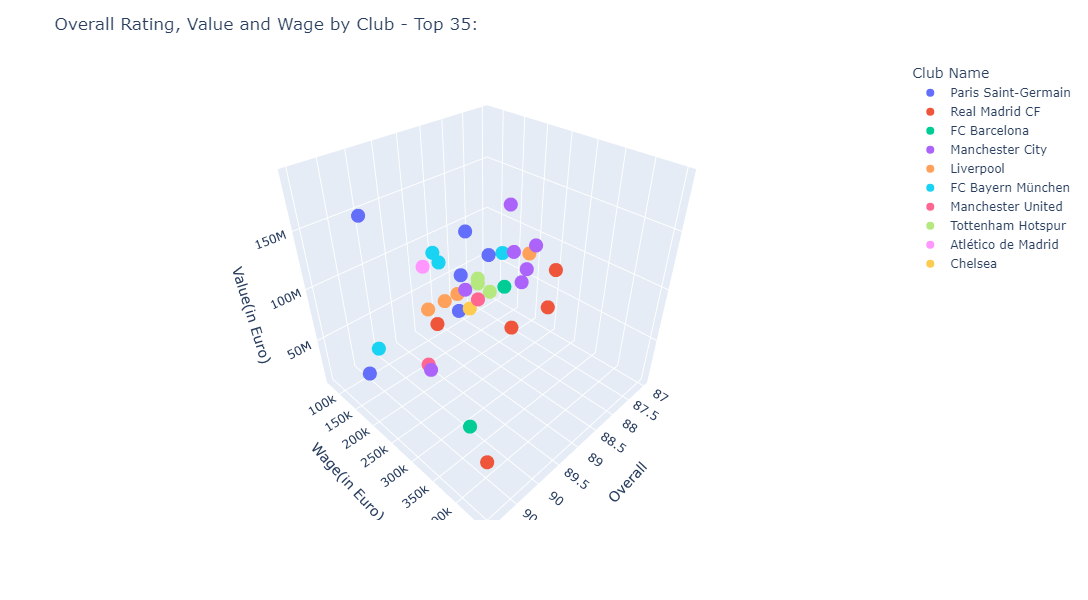

In [36]:
fig = px.scatter_3d(data_frame=fifa.head(35), x='Overall', y='Wage(in Euro)', z='Value(in Euro)', color='Club Name', hover_name='Full Name')
fig.update_layout(width=800, height=600, title='Overall Rating, Value and Wage by Club - Top 35:')
fig.show()

* We can already see which teams are leading the board.

In [37]:
squad = fifa[general_features].groupby('Club Name').head(16) # Top 16 players - club's best squad
squad = squad.groupby('Club Name').mean().sort_values('Overall', ascending = False)
squad.head()

,Age,Height(in cm),Weight(in kg),Overall,Potential,Value(in Euro),Wage(in Euro),Sprint Speed,Defending Total,Dribbling Total,Pace Total,Shooting Total,Passing Total,Physicality Total,BaseStats,TotalStats,International Reputation,Weak Foot Rating
Club Name,,,,,,,,,,,,,,,,,,
Manchester City,27.2500,183.375,78.5000,85.9375,87.6250,73156250.0,202812.5,74.0625,69.6250,81.3125,75.1250,69.8125,78.8125,76.5000,451.1875,2064.0000,2.8750,3.500
Real Madrid CF,28.0000,181.500,76.7500,85.1875,87.3750,56437500.0,215625.0,79.6875,63.7500,80.8750,80.6875,70.1250,78.3750,74.8750,448.6875,2045.0625,2.6875,3.750
Liverpool,27.4375,183.375,77.6875,85.0000,87.0000,62562500.0,160312.5,75.7500,68.6875,80.3750,77.0625,67.7500,76.3750,78.1875,448.4375,2045.9375,2.5625,3.125
Paris Saint-Germain,27.6875,180.750,74.1875,85.0000,87.2500,59093750.0,119187.5,73.5625,65.5625,82.4375,78.6250,72.3750,78.5000,75.3125,452.8125,2032.1250,3.0000,3.625
FC Bayern München,25.8125,183.375,78.1250,84.5625,87.3125,58187500.0,84625.0,78.6875,64.2500,81.5000,80.6875,73.0625,77.4375,75.4375,452.3750,2061.0625,3.1250,3.500


In [38]:
pxq = px.colors.qualitative
club_names = squad.index
colors = pxq.Pastel + pxq.Vivid + pxq.G10 + pxq.Vivid + pxq.Bold + pxq.T10 + pxq.Alphabet

# Define function to rank clubs based on a specific attribute and create a bar chart trace to visualize the rankings 
def rank_clubs_by_attribute_mean(attribute, title=None):
    club_colors = dict(zip(club_names, colors))
    grouped = squad.reset_index()
    grouped = grouped.sort_values(by=attribute, ascending=False)[:10][::-1]
    ncolors = [club_colors.get(club_name, 'gray') for club_name in grouped['Club Name']]
    trace = go.Bar(x=grouped[attribute], y=grouped['Club Name'], orientation='h', marker_color=ncolors)
    return trace

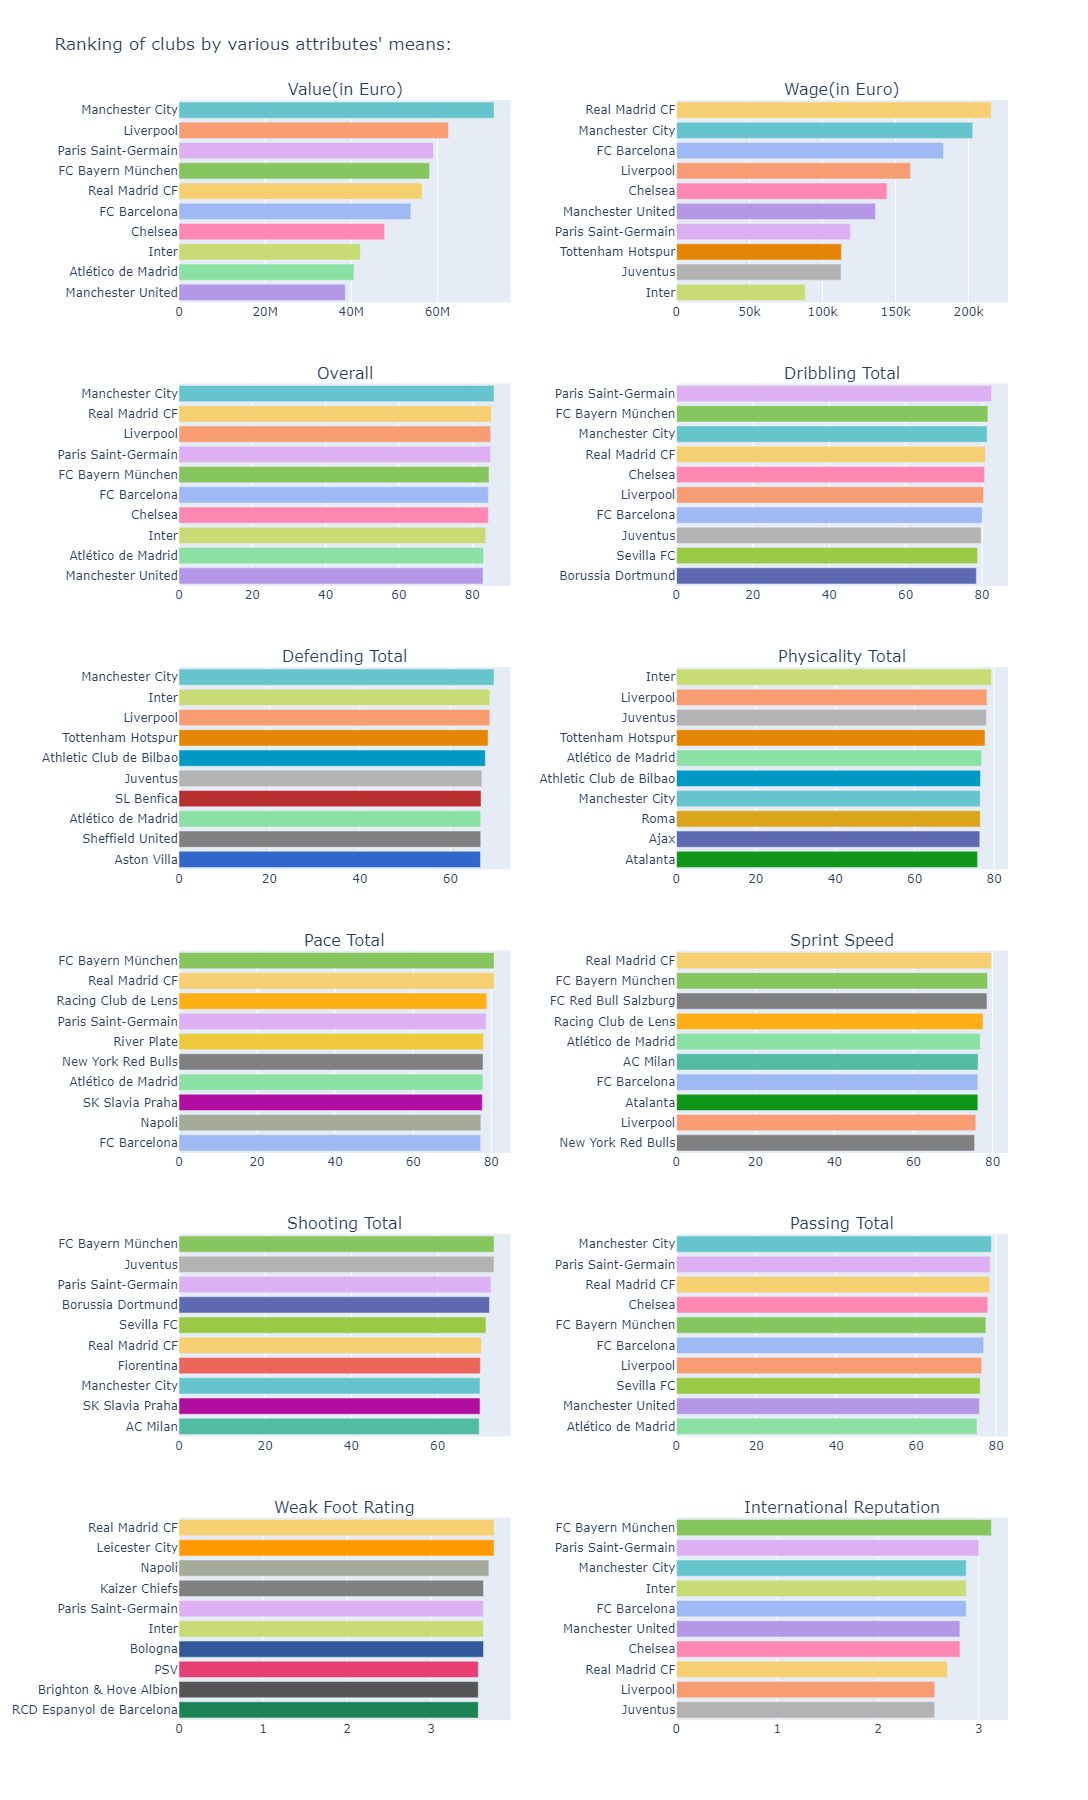

In [39]:
attributes = ['Value(in Euro)', 'Wage(in Euro)', 'Overall', 'Dribbling Total', 'Defending Total', 'Physicality Total', 'Pace Total', 'Sprint Speed', 'Shooting Total', 'Passing Total', 'Weak Foot Rating', 'International Reputation']
positions = [(1,1), (1,2), (2,1), (2,2), (3,1), (3,2), (4,1), (4,2), (5,1), (5,2), (6,1), (6,2)]

fig = make_subplots(rows=6, cols=2, subplot_titles = attributes, horizontal_spacing = 0.2, vertical_spacing=0.05)

def uwt(att,row,col):
    fig.add_trace(go.Bar(rank_clubs_by_attribute_mean(att, title = att), name=att), row, col)
for att, pos in zip(attributes, positions):
    uwt(att, *pos)
fig.update_layout(height=1800, width=1150 ,title_text="Ranking of clubs by various attributes' means:", showlegend=False)
fig.show()

### Summing all attributes to assess the total teams' abilities:

In [40]:
squad = fifa[general_features].groupby('Club Name').head(16) # Top 16 players - club's best squad
squad = squad.groupby('Club Name').mean().sort_values('Overall', ascending = False)
scores = []
for i in range(len(squad)):
    scores.append(sum(squad.iloc[i][3:5]) + sum(squad.iloc[i][7:]))
squad['Score'] = scores
nsquad = squad[['Score']].sort_values('Score', ascending = False).head(25)
nsquad

,Score
Club Name,
FC Bayern München,3223.0000
Manchester City,3220.3750
Real Madrid CF,3201.1250
Liverpool,3196.2500
Paris Saint-Germain,3190.1875
Atlético de Madrid,3169.4375
FC Barcelona,3157.2500
Chelsea,3145.5000
Juventus,3141.6250


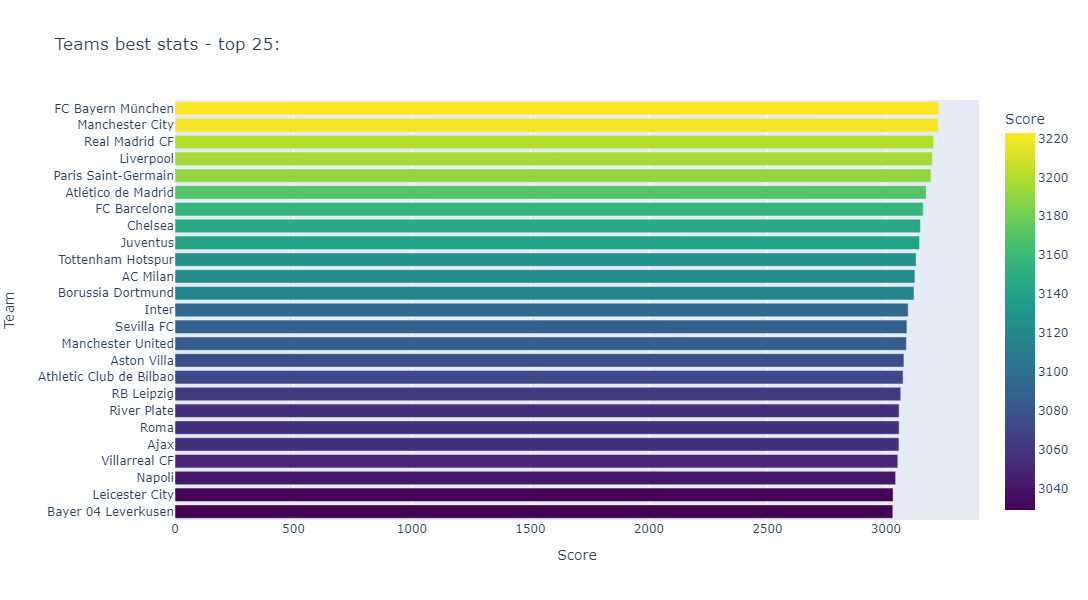

In [41]:
fig = px.bar(nsquad[::-1], x='Score', y=nsquad.index[::-1], title='Teams best stats - top 25:',
             orientation='h', color='Score', color_continuous_scale='Viridis')
fig.update_layout(height=600, xaxis_title='Score', yaxis_title='Team')
fig.show()

---

---

#      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Thanks for Watching !

<div style="text-align: center;">
    <img src="https://tenor.com/view/regele-fotbalului-regele-regelemeulafotbal-regelemeulafootball-sefuluiyzsem-gif-25766031.gif" alt="Messi" style="width: 600px; height: 500px;">
</div>

---

---